In [1]:
import pandas as pd
import numpy as np
from scipy import  stats
import matplotlib.pyplot as plt
import tushare as ts
import datetime
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA

In [2]:
ts.get_gdp_year()

,year,gdp,pc_gdp,gnp,pi,si,industry,cons_industry,ti,trans_industry,lbdy
0,2018,900309.00,64644.00,NaN,64734.00,366001.00,305160.00,61808.00,469575.00,40550.00,100224.00
1,2017,820754.00,59660.00,NaN,62100.00,332743.00,278328.00,55314.00,425912.00,37173.00,92348.00
2,2016,743585.50,53935.00,NaN,63672.80,296547.70,247877.70,49702.90,383365.00,33058.80,84648.80
3,2015,689052.10,50251.00,NaN,60862.10,282040.30,236506.30,46626.70,346149.70,30487.80,78340.40
4,2014,643974.00,47203.00,NaN,58343.50,277571.80,233856.40,44880.50,308058.60,28500.90,73582.00
5,2013,588018.80,43852.00,NaN,55321.70,261956.10,210689.42,38995.00,275887.00,27282.93,66512.40
6,2012,534123.00,40007.00,NaN,50892.70,240200.40,199670.66,35491.34,243030.00,24660.00,60295.21
7,2011,484123.50,35197.79,NaN,46153.30,223390.30,188470.15,31942.66,214579.90,22432.84,52903.35
8,2010,401202.00,29992.00,403260.00,40533.60,187581.42,160867.01,26714.41,173087.00,18968.48,43814.55
9,2009,340902.80,25608.00,341401.50,35226.00,157638.80,135239.90,22398.80,148038.00,16727.10,36102.70


In [3]:
ALL_DATA=ts.get_gdp_year()
YEAR_GDP_DATA=ALL_DATA.loc[:3:-1,['year','gdp']]
YEAR_GDP_DATA

,year,gdp
66,1952,679.00
65,1953,824.00
64,1954,859.00
63,1955,910.00
62,1956,1028.00
61,1957,1068.00
60,1958,1307.00
59,1959,1439.00
58,1960,1457.00
57,1961,1220.00


In [4]:
GDP_DATA=YEAR_GDP_DATA.set_index('year')

GDP_DATA


,gdp
year,
1952,679.00
1953,824.00
1954,859.00
1955,910.00
1956,1028.00
1957,1068.00
1958,1307.00
1959,1439.00
1960,1457.00


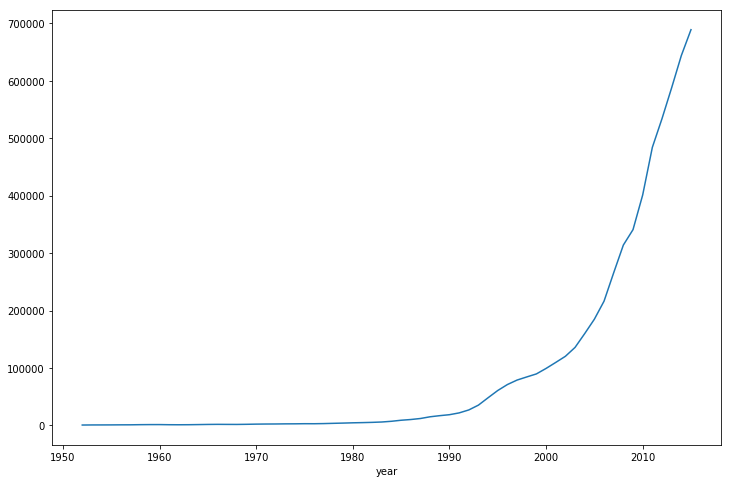

In [5]:
GDP_SERIES=GDP_DATA['gdp']
GDP_SERIES.plot(figsize=(12,8))
plt.show()

E:\anaconda\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


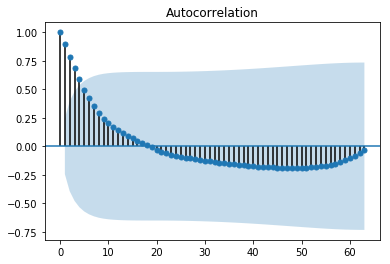

In [6]:
plot_acf(GDP_SERIES).show()

E:\anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
E:\anaconda\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


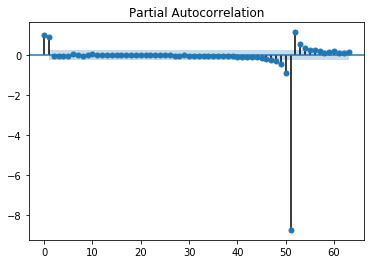

In [7]:
plot_pacf(GDP_SERIES).show()

In [8]:
def test_stationarity(timeseries):
    
    #滑动均值和方差
    rolmean = timeseries.rolling(4).mean()
    rolstd = timeseries.rolling(4).std()

    #绘制滑动统计量
    plt.figure(figsize=(24, 8))   
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #adf检验
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

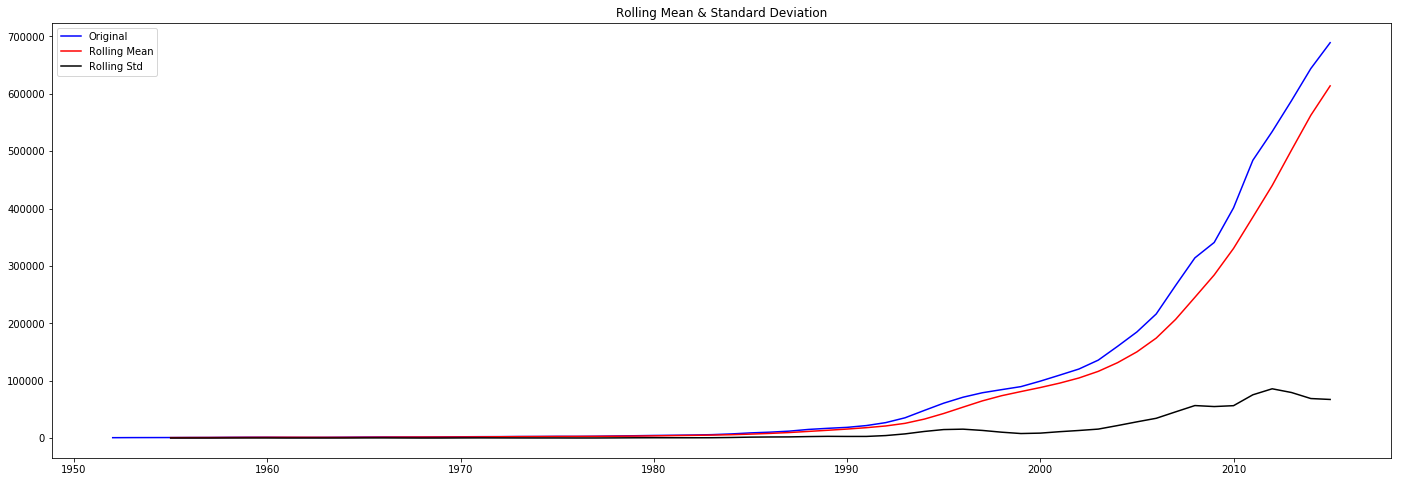

Results of Dickey-Fuller Test:
Test Statistic                  4.002859
p-value                         1.000000
#Lags Used                     11.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


In [9]:
test_stationarity(GDP_SERIES)

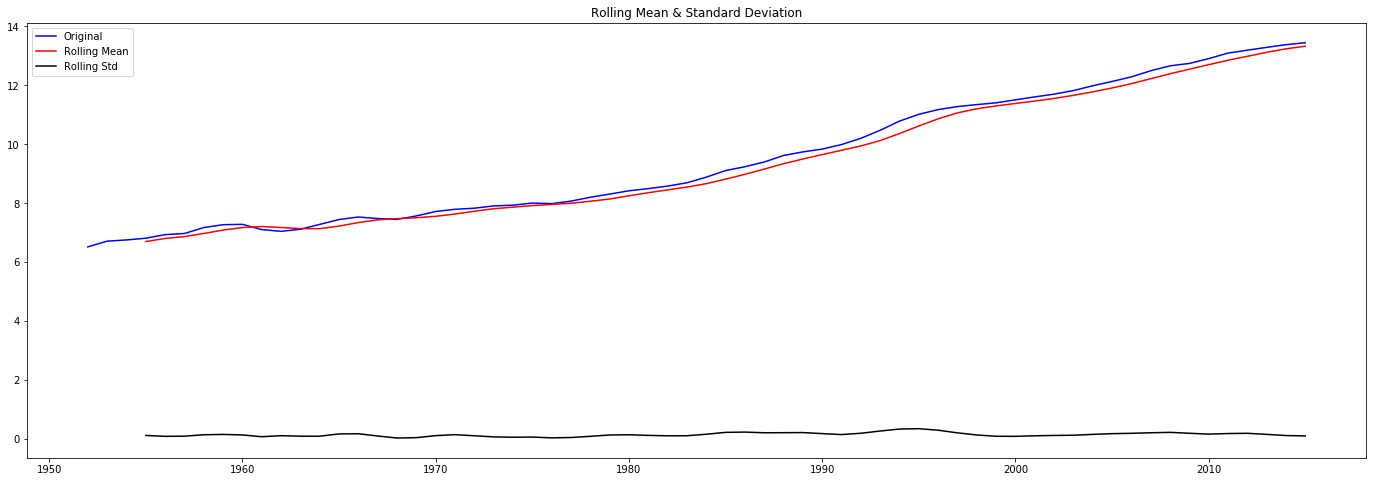

Results of Dickey-Fuller Test:
Test Statistic                  1.459517
p-value                         0.997368
#Lags Used                      2.000000
Number of Observations Used    61.000000
Critical Value (1%)            -3.542413
Critical Value (5%)            -2.910236
Critical Value (10%)           -2.592745
dtype: float64


In [10]:
GDP_LOG = np.log(GDP_SERIES)
test_stationarity(GDP_LOG)


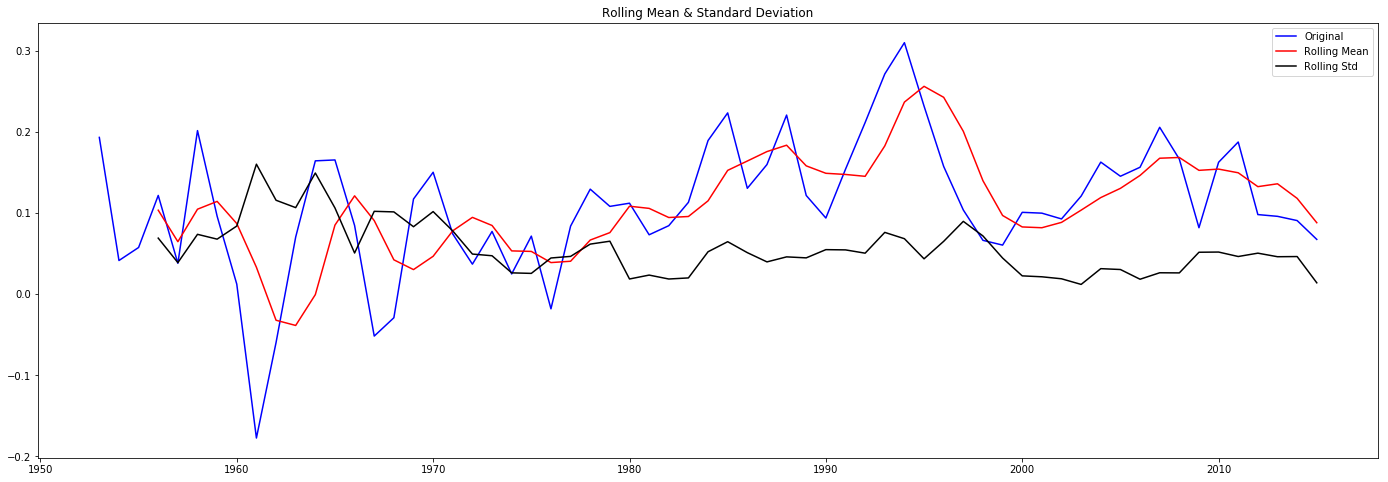

Results of Dickey-Fuller Test:
Test Statistic                 -3.688107
p-value                         0.004284
#Lags Used                      2.000000
Number of Observations Used    60.000000
Critical Value (1%)            -3.544369
Critical Value (5%)            -2.911073
Critical Value (10%)           -2.593190
dtype: float64


In [11]:


GDP_LOG_DIFF1=GDP_LOG.diff(1)
GDP_LOG_DIFF1.dropna(inplace=True)
test_stationarity(GDP_LOG_DIFF1)


E:\anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


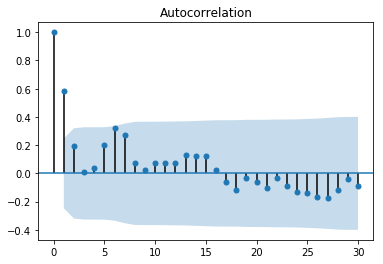

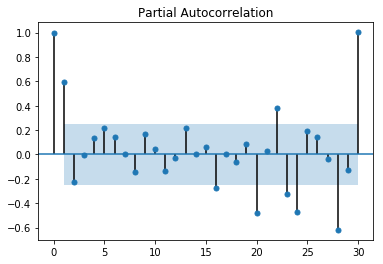

In [12]:
plot_acf(GDP_LOG_DIFF1,lags=30)
plot_pacf(GDP_LOG_DIFF1,lags=30)
plt.show()


In [13]:

import statsmodels.tsa.stattools as st
order = st.arma_order_select_ic(GDP_LOG_DIFF1,max_ar=3,max_ma=3,ic=['aic', 'bic', 'hqic'])
order.bic_min_order

E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasti

(0, 2)

In [14]:
MODEL20=ARMA(GDP_LOG_DIFF1,(0,2)).fit()


E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


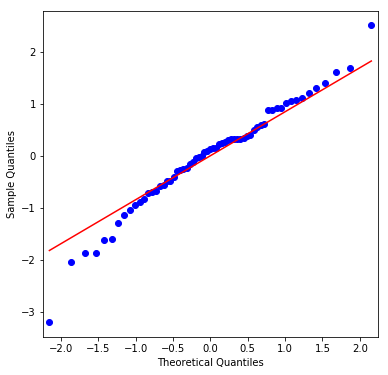

In [15]:

resid = MODEL20.resid
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)
plt.show()

In [16]:

import statsmodels.api as sm
print(sm.stats.durbin_watson(resid.values))

2.034896238924308


In [17]:
PREDICT_ARMA = MODEL20.predict(start=0,end=70)
PREDICT_ARMA.index=PREDICT_ARMA.index+1953


E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


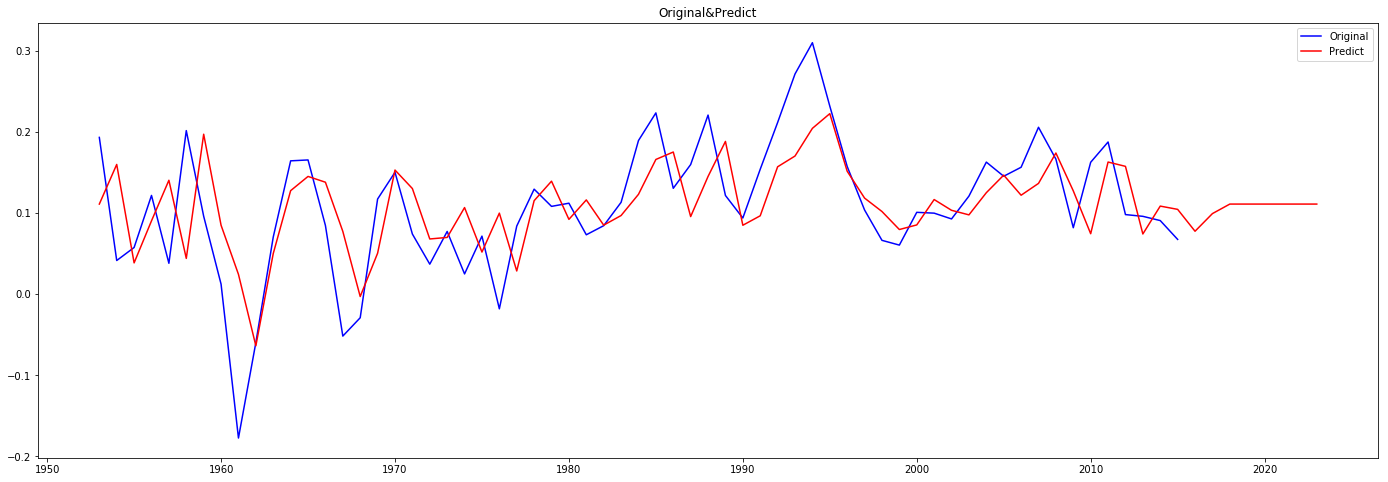

In [20]:

plt.figure(figsize=(24, 8))   
orig = plt.plot(GDP_LOG_DIFF1, color='blue',label='Original')
predict = plt.plot(PREDICT_ARMA, color='red',label='Predict')
plt.legend(loc='best')
plt.title('Original&Predict')
plt.show(block=False)

In [33]:

# 一阶差分还原
PREDICT_GDP_LOG = PREDICT_ARMA.add(GDP_LOG.shift(1))
PREDICT_GDP_LOG[2016]=PREDICT_ARMA[2016]+GDP_LOG[2015]
PREDICT_GDP_LOG[2017]=PREDICT_ARMA[2017]+PREDICT_GDP_LOG[2016]
PREDICT_GDP_LOG[2018]=PREDICT_ARMA[2018]+PREDICT_GDP_LOG[2017]
PREDICT_GDP_LOG[2019]=PREDICT_ARMA[2019]+PREDICT_GDP_LOG[2018]
PREDICT_GDP_LOG[2020]=PREDICT_ARMA[2020]+PREDICT_GDP_LOG[2019]

# 对数还原
PREDICT_GDP = np.exp(PREDICT_GDP_LOG)
PREDICT_GDP.dropna(inplace=True)

In [25]:
print(PREDICT_GDP[2016])
print(PREDICT_GDP[2017])
print(PREDICT_GDP[2018])
print(PREDICT_GDP[2019])
print(PREDICT_GDP[2020])

744741.6642513823
822660.0414173108
919478.4399263766
1027691.3414110708
1148639.7585307742


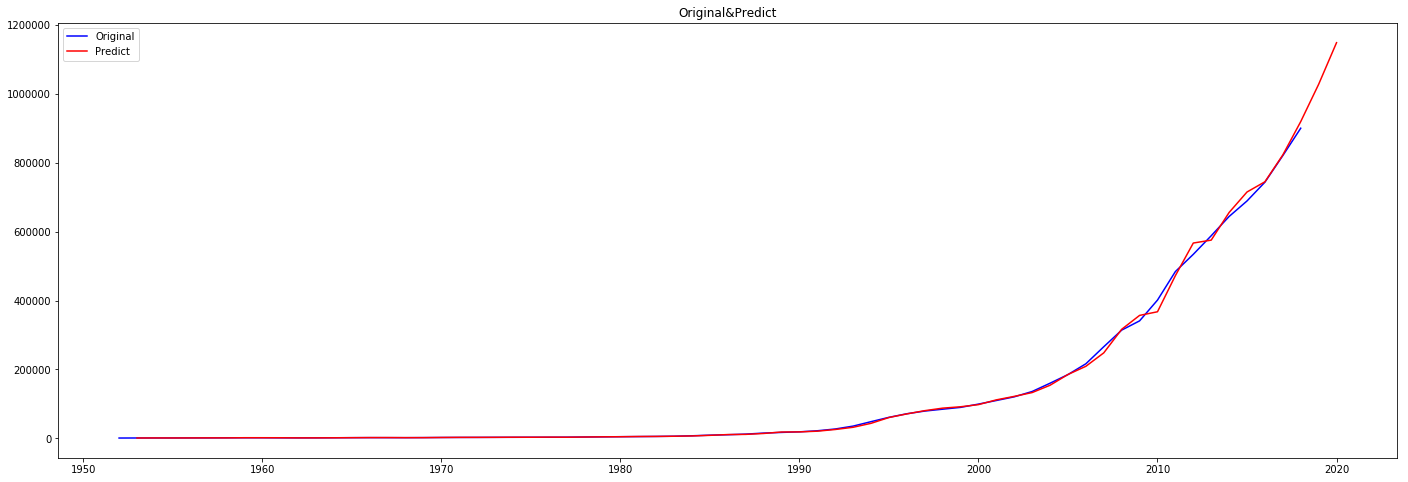

In [27]:
all_DATA=ts.get_gdp_year()
year_GDP_DATA=all_DATA.loc[::-1,['year','gdp']]
gdp_DATA=year_GDP_DATA.set_index('year')
GD_SERIES=gdp_DATA['gdp']
plt.figure(figsize=(24, 8))   
orig = plt.plot(GD_SERIES, color='blue',label='Original')
predict = plt.plot(PREDICT_GDP, color='red',label='Predict')
plt.legend(loc='best')
plt.title('Original&Predict')
plt.show(block=False)

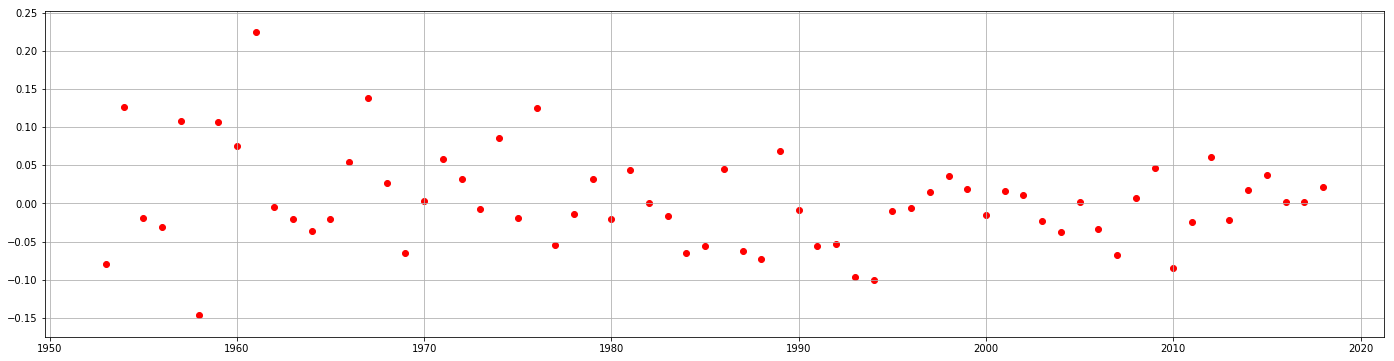

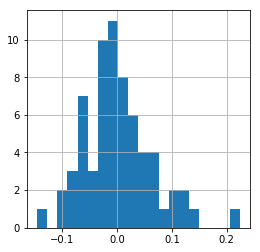

In [36]:

ERROR_RATE=(PREDICT_GDP-GD_SERIES)/GD_SERIES
plt.figure(figsize=(24, 6))   
plt.scatter(ERROR_RATE.index,ERROR_RATE,color='r')
plt.grid(True)
plt.figure(figsize=(4, 4))
plt.hist(ERROR_RATE[1:-2], bins=20)
plt.grid(True)
plt.show()

In [35]:
ERROR_RATE[1:-2]

1953   -0.078991
1954    0.125896
1955   -0.018825
1956   -0.030873
1957    0.107918
1958   -0.145937
1959    0.106572
1960    0.075409
1961    0.223888
1962   -0.003968
1963   -0.020141
1964   -0.036135
1965   -0.020146
1966    0.054872
1967    0.137967
1968    0.026562
1969   -0.064717
1970    0.002730
1971    0.057756
1972    0.031578
1973   -0.007345
1974    0.085352
1975   -0.019489
1976    0.125395
1977   -0.053880
1978   -0.014121
1979    0.031595
1980   -0.019751
1981    0.043978
1982    0.000640
          ...   
1989    0.069010
1990   -0.008881
1991   -0.055832
1992   -0.053188
1993   -0.096314
1994   -0.100343
1995   -0.009256
1996   -0.005878
1997    0.014811
1998    0.036232
1999    0.019410
2000   -0.015423
2001    0.016939
2002    0.010701
2003   -0.022889
2004   -0.037061
2005    0.001395
2006   -0.033936
2007   -0.066927
2008    0.007564
2009    0.046555
2010   -0.084425
2011   -0.024425
2012    0.061344
2013   -0.021552
2014    0.018027
2015    0.037778
2016    0.0015

In [38]:
ERROR=(PREDICT_GDP-GD_SERIES)

ERROR[-5:-2]

2016     1156.164251
2017     1906.041417
2018    19169.439926
dtype: float64

In [47]:

np.set_printoptions(suppress=True,threshold=np.nan)
print("2016-2018预测数据")
print(PREDICT_GDP[-5:-2])
print("2016-2018真实数据")
print(GD_SERIES[-3:])
print("2019-2020预测数据")
print(PREDICT_GDP[-2:])

2016-2018预测数据
2016    744741.664251
2017    822660.041417
2018    919478.439926
dtype: float64
2016-2018真实数据
year
2016    743585.5
2017    820754.0
2018    900309.0
Name: gdp, dtype: float64
2019-2020预测数据
2019    1.027691e+06
2020    1.148640e+06
dtype: float64
